In [5]:
import cv2
import matplotlib.pylab as plt
import numpy as np
from datetime import datetime as dt
from scipy import signal
from scipy.signal import correlate
from scipy import stats
import os

plt.rcParams['figure.figsize'] = [15, 2]

In [2]:
img = cv2.imread("image 2024-03-23 14-18-46.png")

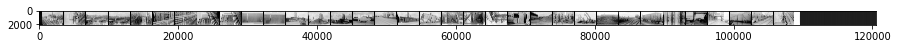

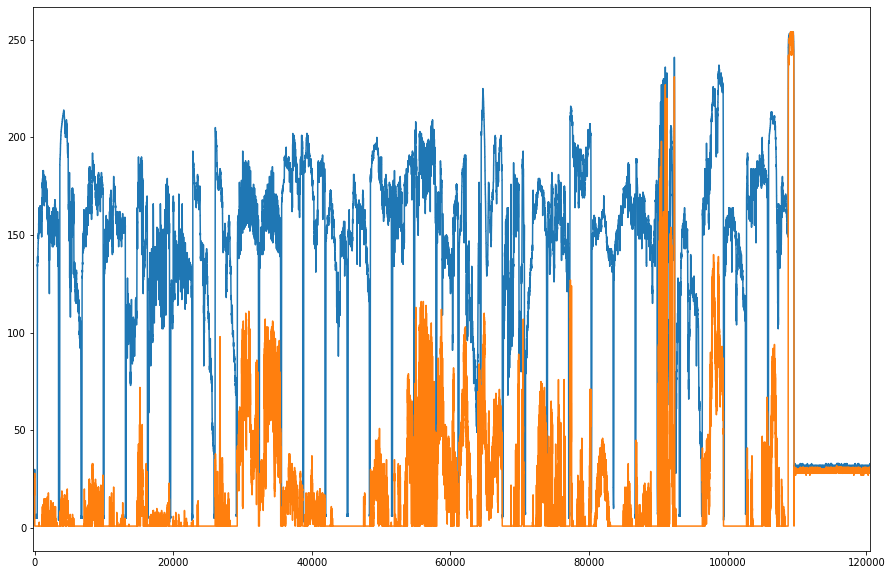

In [3]:
# Convert the image to a float type for accurate division
image = img.astype(float)

# Calculate the average of each column
# The shape of `image` is (height, width, channels), and we average over the height (axis=0)
column_averages = np.mean(image, axis=0).T[0]

# Convert the averages back to the appropriate data type (e.g., uint8 for a typical image)
column_averages = column_averages.astype(np.uint8)

min_in_rows = np.min(image, axis=0).T[0]

plt.rcParams['figure.figsize'] = [15, 10]

plt.imshow(img)
plt.show()
plt.plot(column_averages)
plt.plot(min_in_rows)
plt.xlim(-200, image.shape[1])
plt.show()

20
[387, 3458]
[3622, 6689]
[6829, 9904]
[10028, 13101]
[13202, 16273]
[16405, 19471]
[19633, 22695]
[22820, 25891]
[26037, 29110]
[29232, 32307]
[32431, 35513]
[35624, 38694]
[38818, 41892]
[42016, 45085]
[45225, 48302]
[48425, 51505]
[51635, 54716]
[54823, 57903]
[58006, 61095]
[61230, 64310]
[64411, 67485]
[67607, 70682]
[70824, 73887]
[73996, 77065]
[77217, 80290]
[80370, 83483]
[83574, 86644]
[86750, 89842]
[89953, 93015]
[93159, 96213]
[96328, 99393]
[99512, 102570]
[102698, 105769]
33
(2047, 3071, 3)


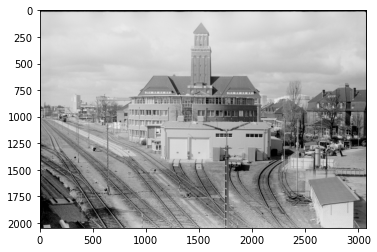

(2047, 3067, 3)


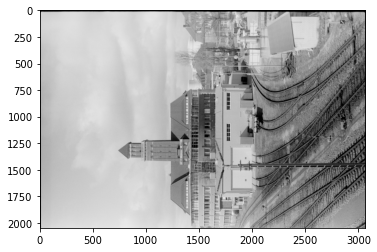

(2047, 3075, 3)


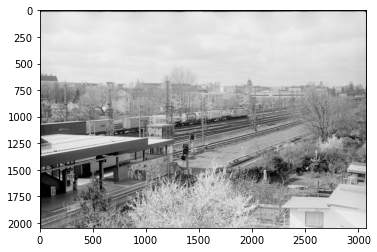

(2047, 3073, 3)


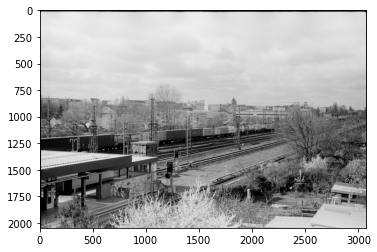

(2047, 3071, 3)


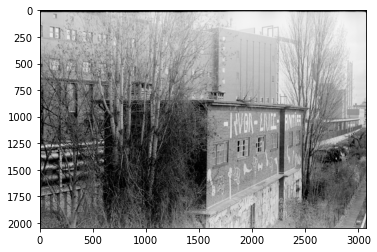

(2047, 3066, 3)


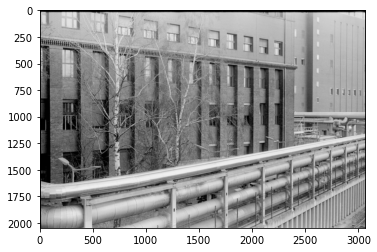

(2047, 3062, 3)


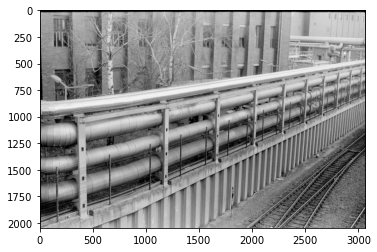

(2047, 3071, 3)


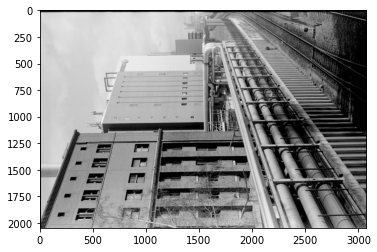

(2047, 3073, 3)


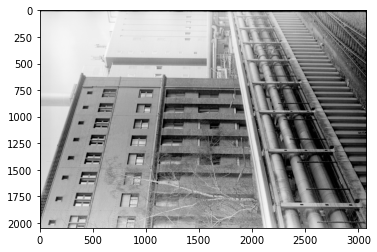

(2047, 3075, 3)


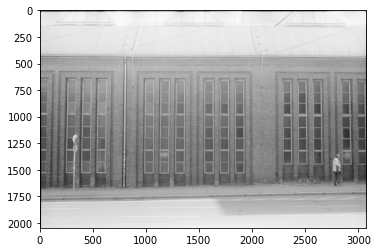

(2047, 3082, 3)


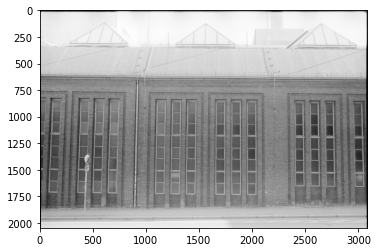

(2047, 3070, 3)


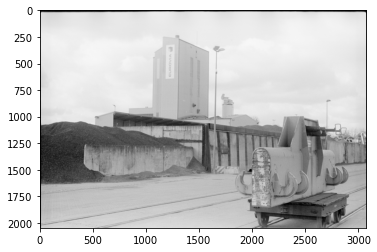

(2047, 3074, 3)


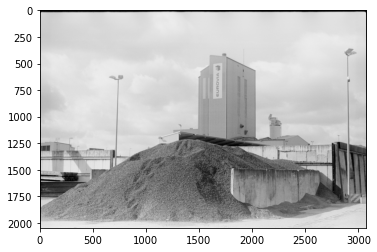

(2047, 3069, 3)


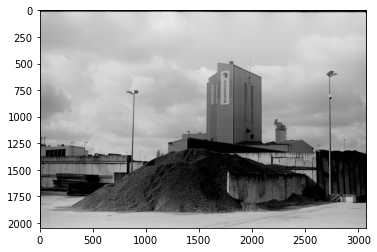

(2047, 3077, 3)


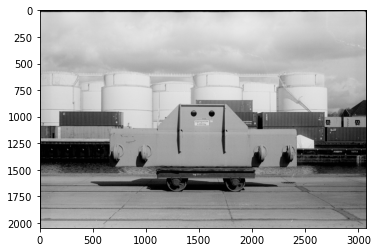

(2047, 3080, 3)


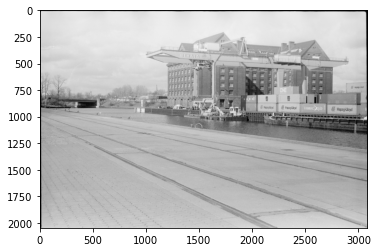

(2047, 3081, 3)


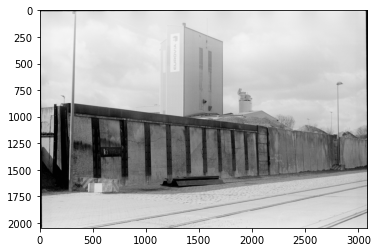

(2047, 3080, 3)


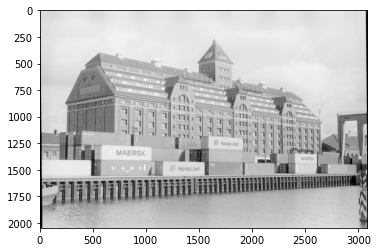

(2047, 3089, 3)


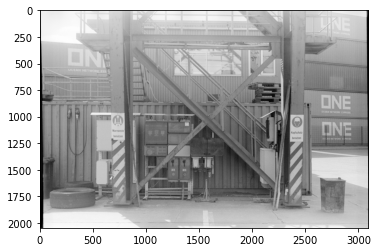

(2047, 3080, 3)


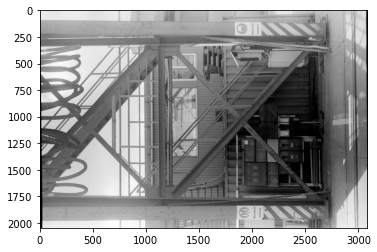

(2047, 3074, 3)


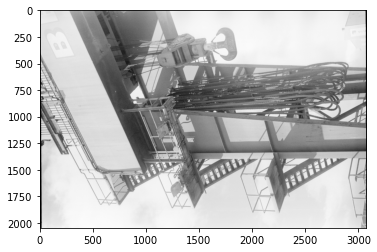

(2047, 3075, 3)


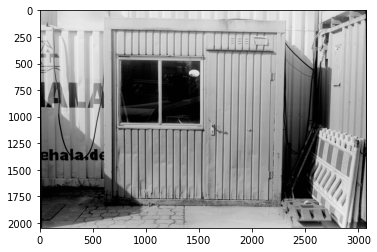

(2047, 3063, 3)


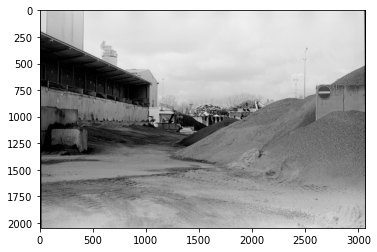

(2047, 3069, 3)


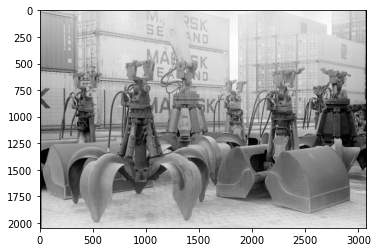

(2047, 3073, 3)


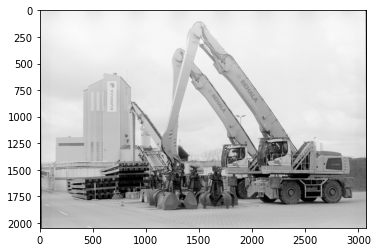

(2047, 3113, 3)


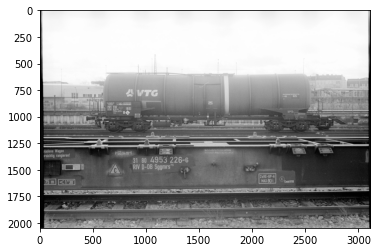

(2047, 3070, 3)


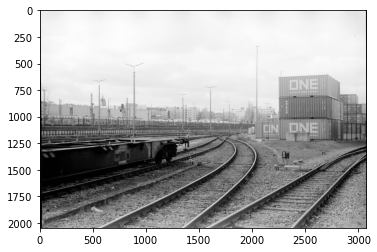

(2047, 3092, 3)


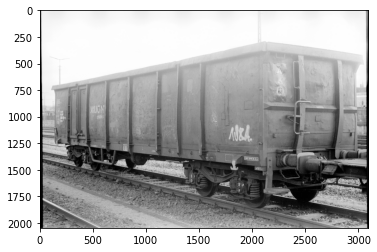

(2047, 3062, 3)


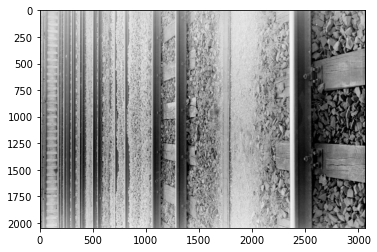

(2047, 3054, 3)


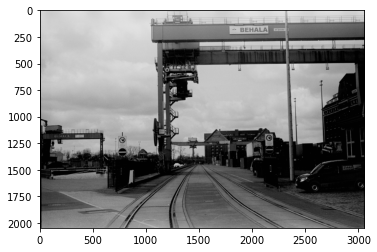

(2047, 3065, 3)


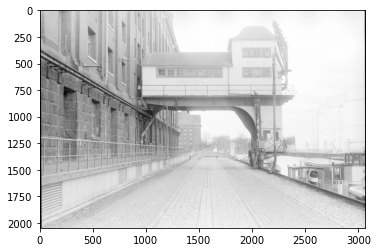

(2047, 3058, 3)


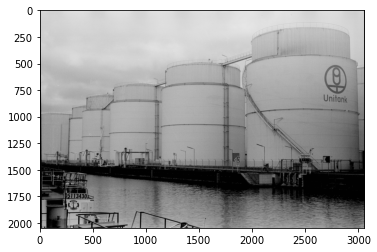

(2047, 3071, 3)


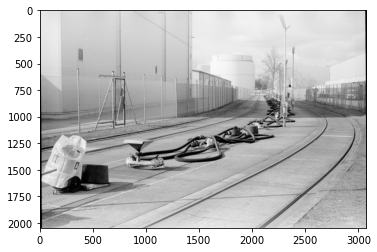

In [14]:
column_averages = np.mean(image, axis=0).T[0].astype(np.uint8)

threshold = 20

print(threshold)

image_rot = np.transpose(image, (1, 0, 2))

detected = False

locs = []
start = 0
detected = False

for i, line in enumerate(image_rot):
    average = np.mean(line)
    # Should be data in the image
    if average > threshold:
        if not detected:
            detected = True
            start = i
    # Potential frame gap
    if average < threshold:
        if detected:
            if i - start > 2750:
                locs.append([start, i])
            detected = False
            
for loc in locs:
    print(loc)
    
print(len(locs))

plt.rcParams['figure.figsize'] = [6, 4]

os.mkdir("outputs")

date_time = str(dt.now()).replace(':','_').split('.')[0]

for i, loc in enumerate(locs):
    x, y, width, height = loc[0], 0, loc[1] - loc[0], 2047
    roi = img[y:y+height, x:x+width]
    print(roi.shape)
    plt.imshow(roi)
    plt.show()
    cv2.imwrite(f"outputs/{date_time} {i}.png", roi)

(2047, 3000, 3)


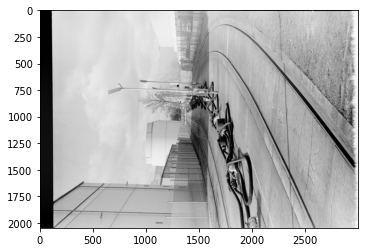

In [15]:
pos = 105769

x, y, width, height = pos, 0, 3000, 2047
roi = img[y:y+height, x:x+width]
print(roi.shape)
plt.imshow(roi)